In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
seq_data = pd.read_csv('../output/datasets/cleavage_filtered.csv.gz')

In [3]:
seq_data = seq_data.groupby(['core', 'rna', 'sub_mod']).agg(FC=('FC', np.mean),
                                                                 FC_sd=('FC', np.std), 
                                                                 N=('core', np.count_nonzero)).reset_index()

seq_data = seq_data.pivot_table(index=['core', 'rna'], columns='sub_mod', values='FC')
seq_data = seq_data.rename(columns={'C': 'FC_unmod'}).reset_index()

seq_data = seq_data.melt(id_vars=['core', 'rna', 'FC_unmod'], value_name='FC_mod')

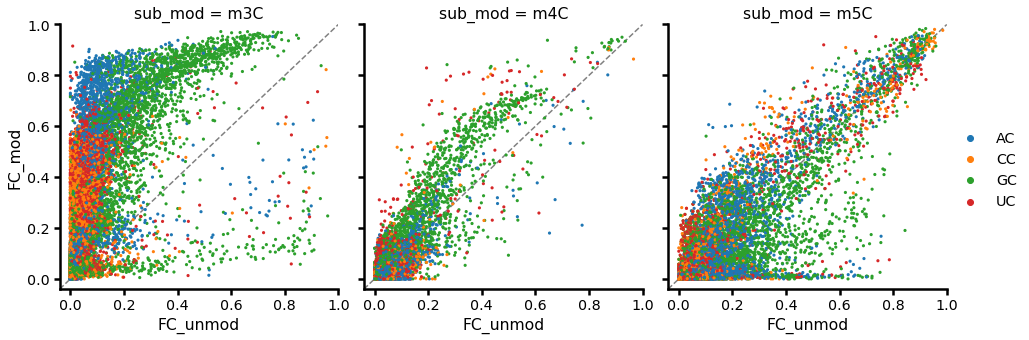

In [6]:
sns.set_context("notebook", font_scale=1.3, rc={"axes.linewidth": 2.5,
                                               "xtick.major.width": 2.5,
                                               "ytick.major.width": 2.5})
g = sns.FacetGrid(seq_data, col='sub_mod', height=5, aspect=0.9)
g.map_dataframe(sns.scatterplot, x='FC_unmod', y='FC_mod', hue='rna', s=10, linewidth=0)
g.map(plt.axline, xy1=(0, 0), slope=1, zorder=0, linestyle='--', c='gray')
g.set(xlim=(-0.04, 1), ylim=(-0.04, 1))
g.add_legend()